In [ ]:
!pip install seaborn

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Flipkart BigBillion Sale Data.csv', encoding = 'unicode_escape')

In [3]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [7]:
# drop blank columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [8]:
# number of null value per columns
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#drop null value
df.dropna(inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [11]:
# change Amount column data type
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
#Rename column
df.rename(columns = {'Marital_Status' : 'Marraid/Unmarraid'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marraid/Unmarraid,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [14]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
# describe specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis


## Gender

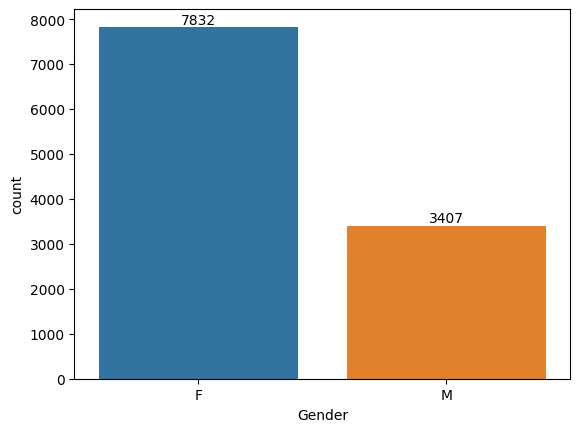

In [16]:
#Plotting bar chart for gender and its counts

ax = sns.countplot(x = 'Gender',hue= 'Gender', data = df)
for bar in ax.containers:
     ax.bar_label(bar)


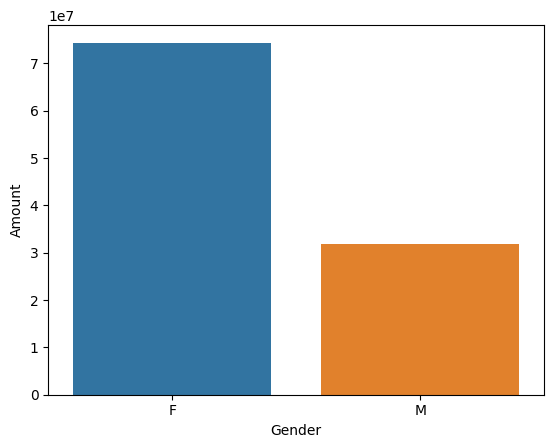

In [17]:
# plotting bar chart Gender vs total amount

sales_gen = df.groupby(['Gender'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sales_gen
sales = sns.barplot(x = 'Gender', y = 'Amount',hue = 'Gender', data = sales_gen)


####  From above we can see that Female buyers are more than male buyers.

## Age

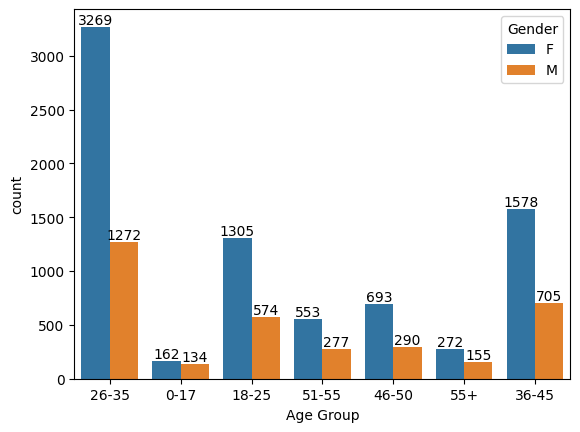

In [18]:
# Number of Male and female per age group

ax = sns.countplot(data = df , x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

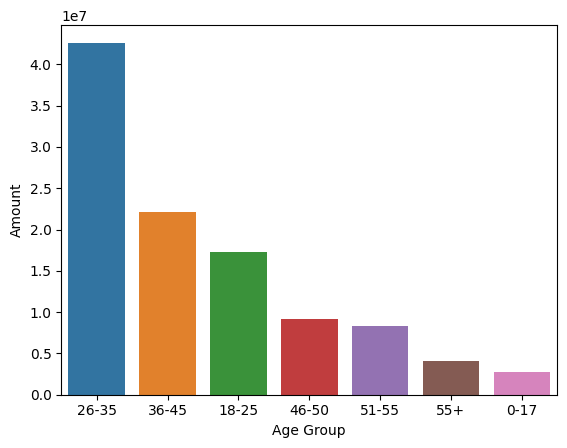

In [21]:
# Total Amount vs age group
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
sns.barplot(x = 'Age Group' , y = 'Amount' ,hue = 'Age Group' ,data = sales_age)

*From the above graph we can see most of the buyer are age group in between 26-35yrs female.*

## State

Text(0.5, 1.0, 'Total Sale Per Top 10 State')

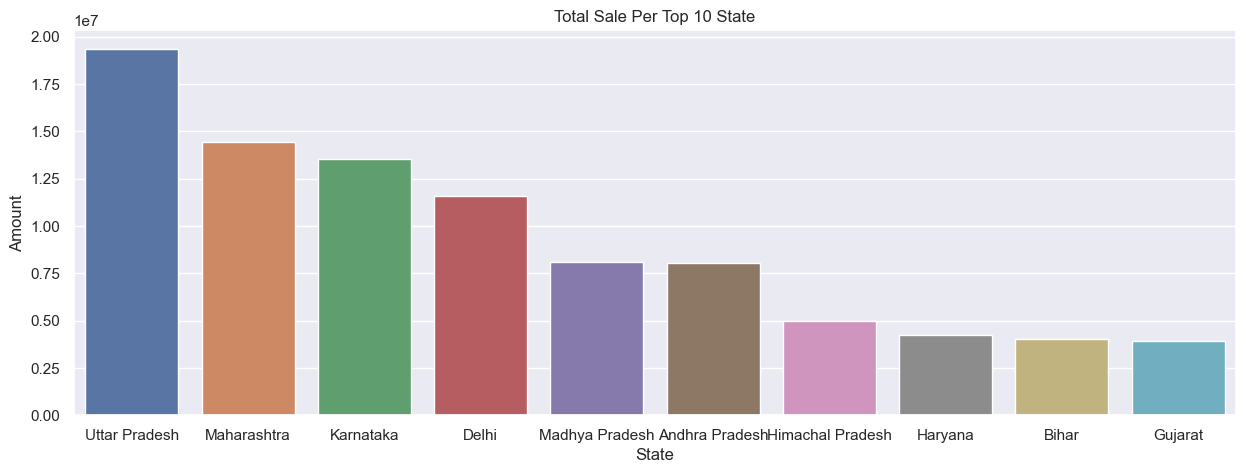

In [27]:
# Total amount per top 10 State
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sales_state
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Amount', hue = 'State', data = sales_state).set_title("Total Sale Per Top 10 State")


Text(0.5, 1.0, 'Total Number of Orders Per Top 10 State')

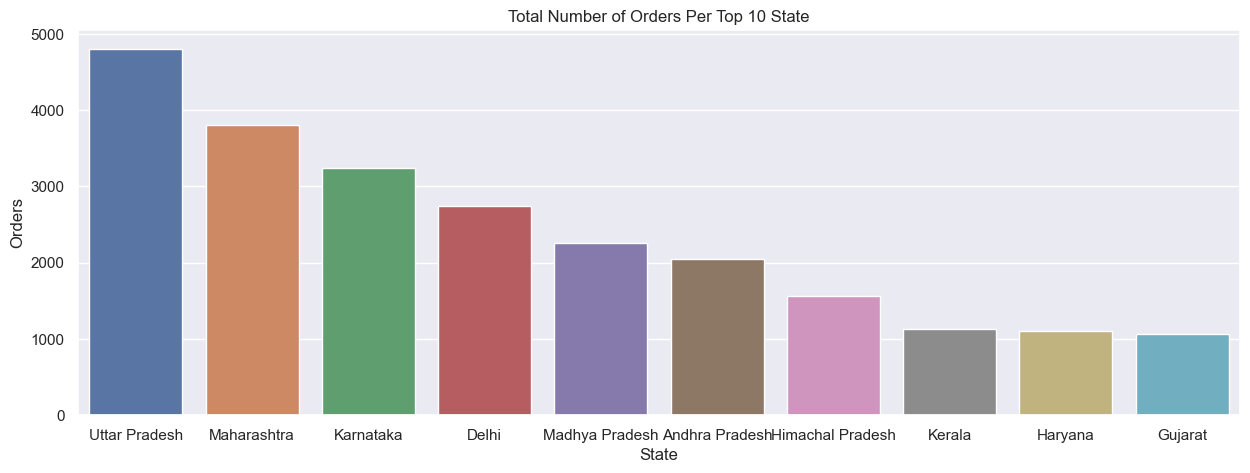

In [28]:
# total number of orders per state 
order_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.barplot(data = order_state, x = 'State', y = 'Orders', hue = 'State').set_title("Total Number of Orders Per Top 10 State")

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

## Martial Status

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\rajiv\AppData\Local\Temp\ipykernel_3972\120601378.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


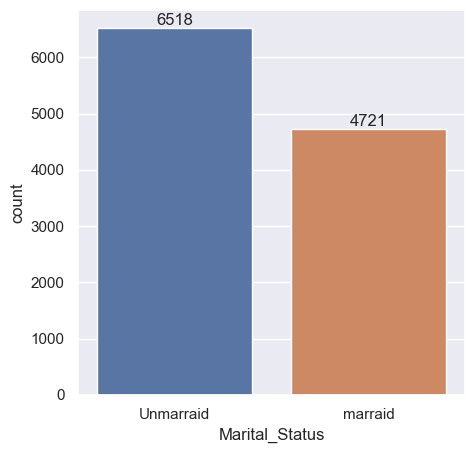

In [52]:
ax = sns.countplot(data = df, x = 'Marital_Status', hue = 'Marital_Status', legend = False)
sns.set(rc = {'figure.figsize':(5,5)})
new_labels = ['Unmarraid','marraid']
ax.set_xticklabels(new_labels)
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\rajiv\AppData\Local\Temp\ipykernel_3972\1805352002.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(data = sales_marital, x = 'Marital_Status', y = 'Amount', hue = 'Gender').set_xticklabels(new_labels)


[Text(0, 0, 'Unmarraid'), Text(1, 0, 'marraid')]

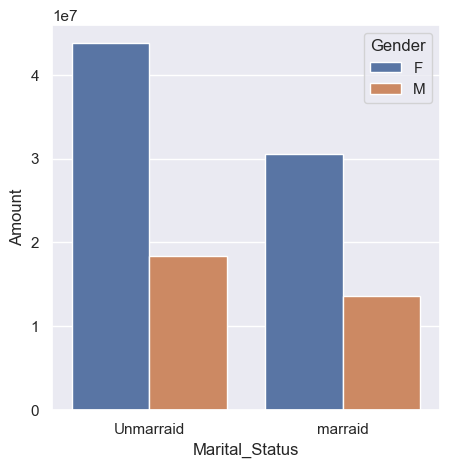

In [60]:
sales_marital = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

new_labels = ['Unmarraid','marraid']

sns.barplot(data = sales_marital, x = 'Marital_Status', y = 'Amount', hue = 'Gender').set_xticklabels(new_labels)

##### *From above graphs we can see that most of buyers are unmarraid women and they have high purchasing power.*

## Occupation

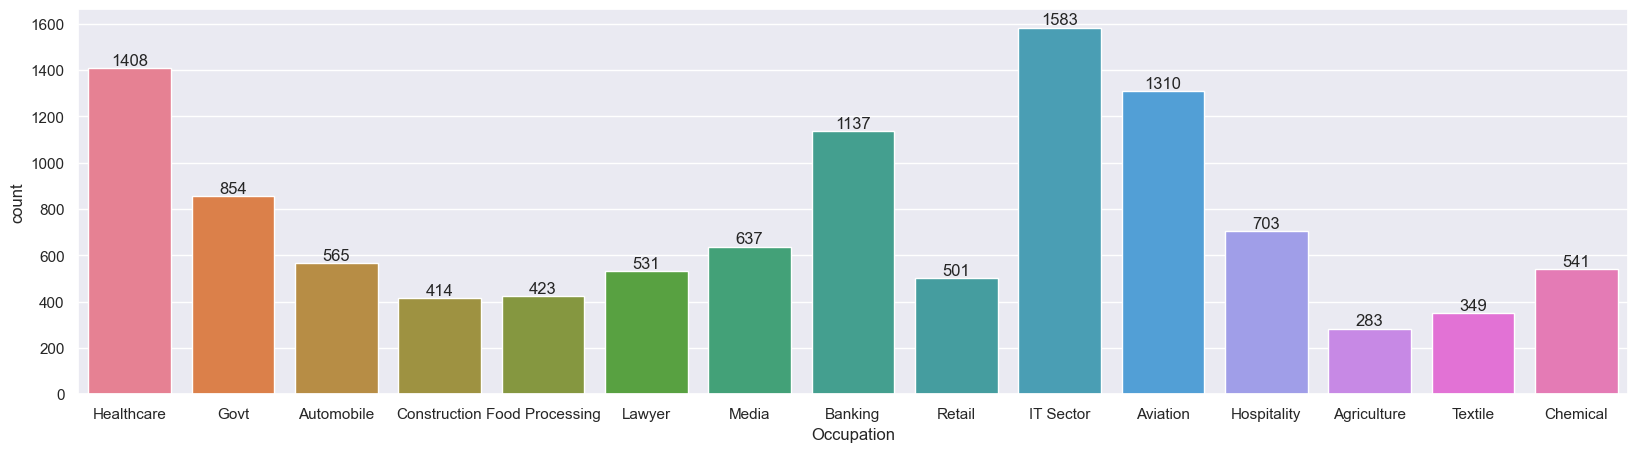

In [68]:
#Total numbers of people per occupations
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation')
#.set_title("Total numbers of people per occupations")
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

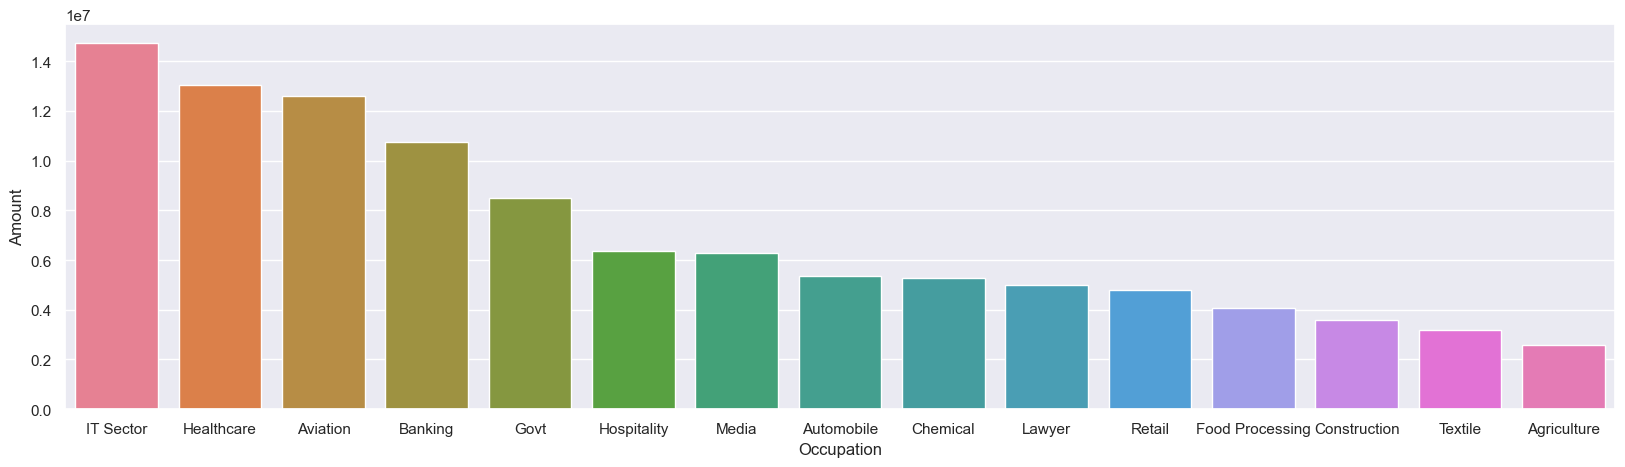

In [71]:
sales_occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(data = sales_occupation, x = 'Occupation', y = 'Amount', hue = 'Occupation')

###### *From the above graph we can see most of the buyers from It Sector, Healtcare and Aviation*

## Product Category 

In [72]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\rajiv\AppData\Local\Temp\ipykernel_3972\3470550897.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, ha = 'right')


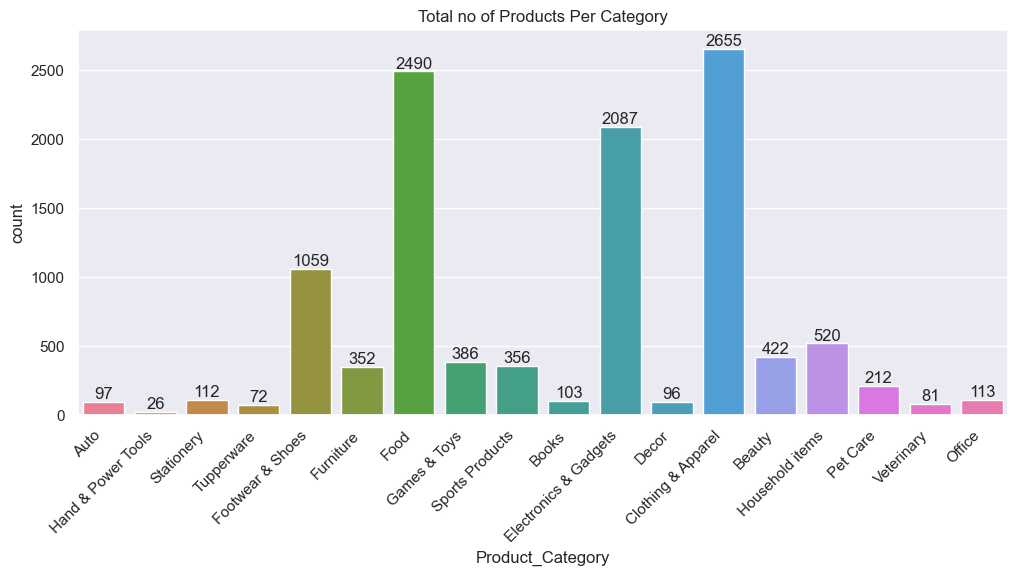

In [96]:
plt.figure(figsize = (12,5))
plt.title("Total no of Products Per Category")
ax = sns.countplot(data = df, x = 'Product_Category', hue = 'Product_Category')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, ha = 'right')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\rajiv\AppData\Local\Temp\ipykernel_3972\3079380452.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, ha = 'right')


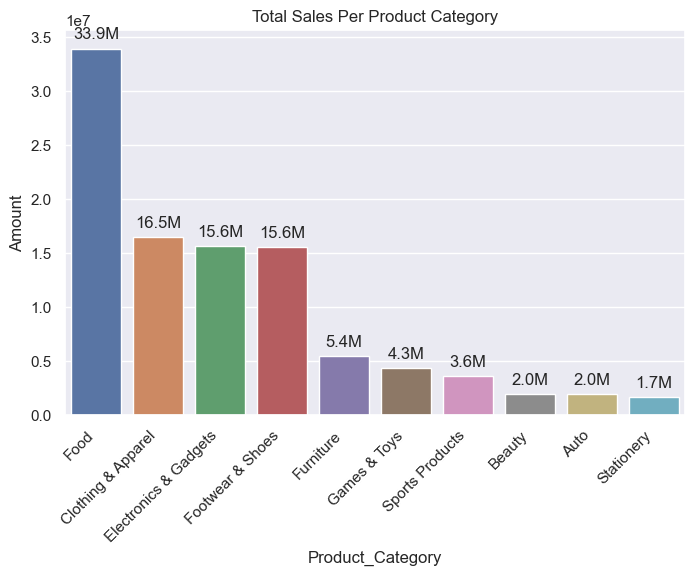

In [108]:
sales_product = df.groupby(['Product_Category'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)
sales_product
plt.figure(figsize = (8,5))
plt.title("Total Sales Per Product Category")
ax = sns.barplot(data = sales_product, x = 'Product_Category' , y = 'Amount', hue = 'Product_Category')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, ha = 'right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()*1e-6:.1f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=0)
#for p in ax.patches:
    #ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                #ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=45)

##### *From above graph we can conclude that Food, Clothing, Elerctronics and Footwear getting more sales where Electronics and footwear giving almost same sales*

## Orders

In [109]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

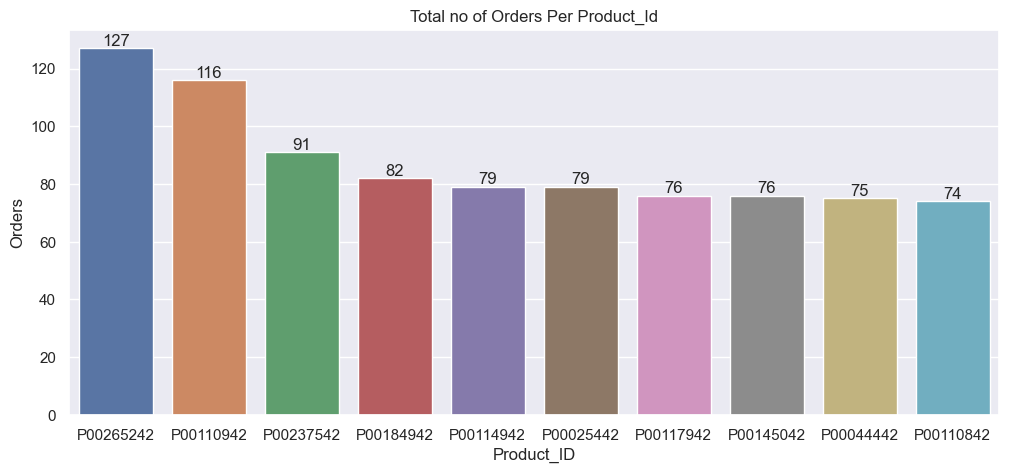

In [120]:
# Total no of orders per Product_id
orders_productId= df.groupby(['Product_ID'] ,  as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
plt.figure(figsize = (12,5))
ax = sns.barplot(data =orders_productId, x = 'Product_ID', y = 'Orders' , hue = 'Product_ID'  )
plt.title("Total no of Orders Per Product_Id")
for bars in ax.containers:
    ax.bar_label(bars)

## Conclusion:

##### *Unmarraid women age group 26-35yrs from Up, Karnataka and Maharastra working in It, Healthcare and Aviation are more like to buy products from Food, Clothing, Electronics and Footwear category.*